<a href="https://colab.research.google.com/github/SparkyGoLarky/SparkyGoLarky/blob/main/Build_linear_regression_ML_model_with_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = '/content/drive/MyDrive/amzn.csv'
data = pd.read_csv(path, index_col="Date")
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0


In [2]:
data = data[["Close"]]
data.head()

,Close
Date,
1997-05-16,20.75
1997-05-19,20.50
1997-05-20,19.63
1997-05-21,17.13
1997-05-22,16.75


Text(0, 0.5, 'Value')

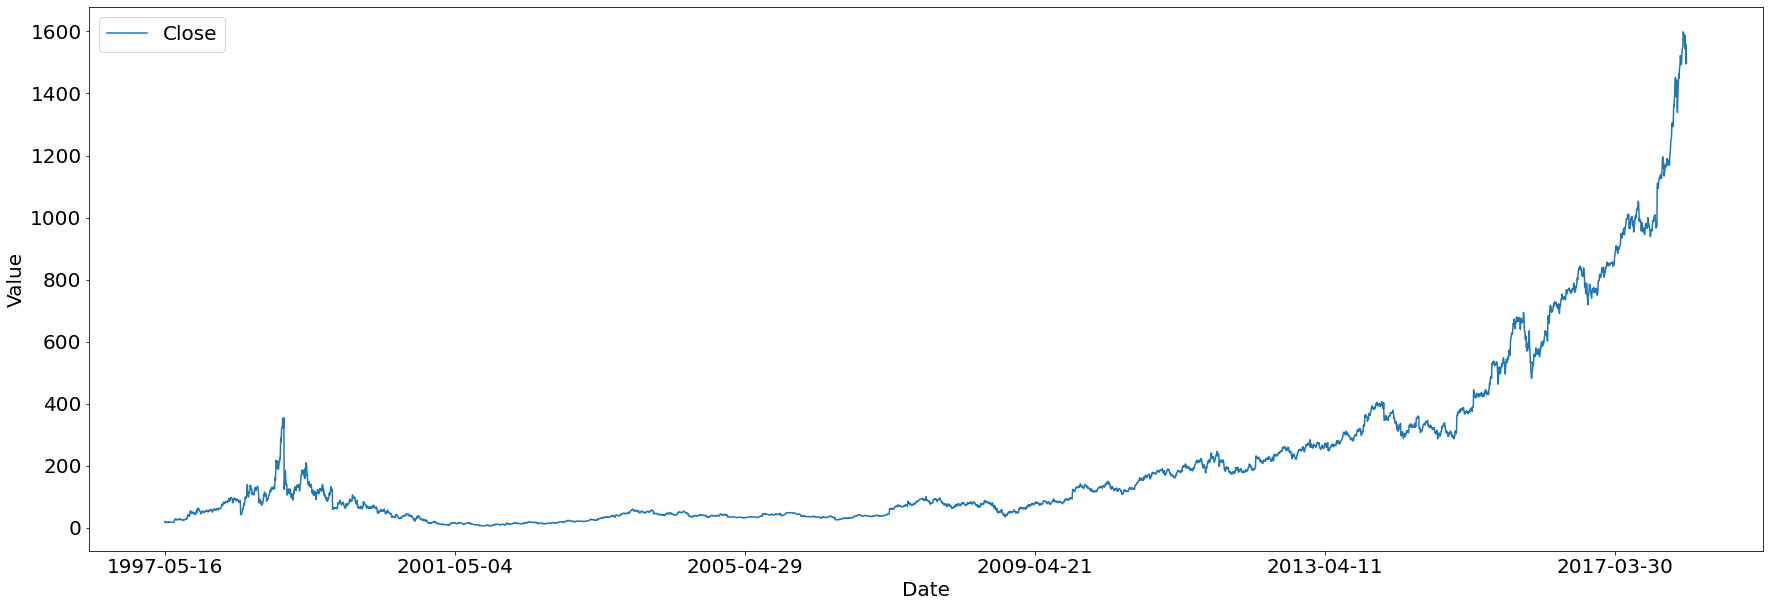

In [3]:
plt.rcParams.update({"font.size":20})
data.plot(figsize=(30,10))
plt.ylabel("Value")

In [4]:
forecast = 30
data["Prediction"] = data[["Close"]].shift(-forecast)
data.head()

,Close,Prediction
Date,,
1997-05-16,20.75,18.50
1997-05-19,20.50,18.19
1997-05-20,19.63,19.06
1997-05-21,17.13,22.94
1997-05-22,16.75,24.00


In [5]:
x = np.array(data.drop(["Prediction"],1))
print(x)

[[  20.75]
 [  20.5 ]
 [  19.63]
 ...
 [1495.56]
 [1555.86]
 [1497.05]]


<ipython-input-5-d44c6590431f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(["Prediction"],1))


In [6]:
from sklearn import preprocessing
x = preprocessing.scale(x)
print(x)

[[-0.67708476]
 [-0.67798312]
 [-0.6811094 ]
 ...
 [ 4.62253907]
 [ 4.83922279]
 [ 4.62789328]]


In [7]:
x_forecast = x[-forecast:]
x = x[:-forecast]
print(x_forecast)

[[4.33129172]
 [4.46259558]
 [4.5010812 ]
 [4.45411509]
 [4.52476189]
 [4.57711814]
 [4.58373005]
 [4.63849389]
 [4.71736964]
 [4.68154316]
 [4.68323207]
 [4.61495694]
 [4.63939225]
 [4.72333473]
 [4.77375053]
 [4.80019816]
 [4.82484908]
 [4.92197944]
 [4.99205129]
 [4.95536239]
 [4.96549586]
 [4.9343049 ]
 [4.89607083]
 [4.79994662]
 [4.94936137]
 [4.93265193]
 [4.79696408]
 [4.62253907]
 [4.83922279]
 [4.62789328]]


In [8]:
y = np.array(data["Prediction"])
print(y)

[18.5  18.19 19.06 ...   nan   nan   nan]


In [9]:
y = y[:-forecast]
print(y)

[  18.5    18.19   19.06 ... 1495.56 1555.86 1497.05]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train)

[[ 3.5374675 ]
 [-0.6999749 ]
 [-0.66741844]
 ...
 [ 0.03272511]
 [-0.6886556 ]
 [-0.6052162 ]]


In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4174, 1)
(4174,)
(1044, 1)
(1044,)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
confidence = model.score(x_test, y_test)
print(confidence)

0.9841454234663564


In [14]:
forecast_predicted = model.predict(x_forecast)
print(forecast_predicted)

[1496.05504629 1534.79192904 1546.14584294 1532.29003951 1553.13205141
 1568.57803886 1570.5286646  1586.68493425 1609.95462709 1599.38520396
 1599.88346162 1579.74113069 1586.94996492 1611.71443074 1626.58795194
 1634.39045487 1641.66289646 1670.31801252 1690.99040479 1680.16655222
 1683.15609818 1673.95423331 1662.67452799 1634.31624628 1678.39614734
 1673.46657688 1633.43634446 1581.97798955 1645.90338718 1583.55757234]


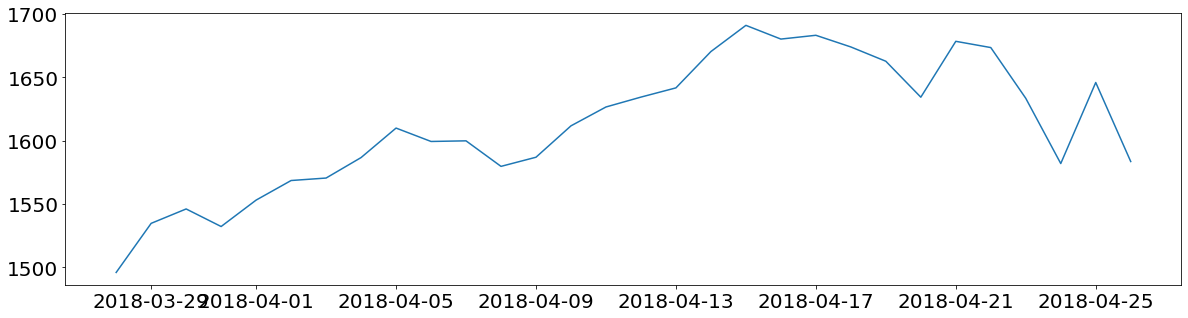

In [21]:
forecast_dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(forecast_dates, forecast_predicted)